In [2]:
import pandas as pd
from sklearn import preprocessing

In [164]:
ds = pd.read_csv('./data/train.csv')
ds.head()
# ds.groupby(['Embarked', 'Survived'])['Embarked'].count()
# ds = ds.fillna(ds.mean())
# ds['Age_10'] = ds['Age'] // 10
# ds['Fare_5'] = ds['Fare'] // 5
# ds = ds.drop(['Name','Cabin','Ticket', 'Age', 'Fare', 'PassengerId'], 1)

ds['Embarked'] = ds['Embarked'].fillna('S')

cleanup_nums = {"Sex":     {"male": 1, "female": 0},
                "Embarked": {"S": 0, "C": 1, "Q": 2}}
ds.replace(cleanup_nums, inplace=True)
# ds = ds.fillna(ds.median())
# ds


ds.groupby(ds['Fare']//10)['Fare'].count()
fare_bins = [0,11,51,101,201,1000]
ds['Fare_range'] = pd.cut(ds['Fare'], fare_bins)
ds['Fare_range'] = ds['Fare_range'].fillna(pd.Interval(11, 51, closed='right'))

age_bins = [0,3,10,18,50,60,120]
ds['Age_range'] = pd.cut(ds['Age'], age_bins)
ds['Age_range'].unique()
ds.groupby(ds['Age_range'])['Age_range'].count()
ds['Age_range'] = ds['Age_range'].fillna(pd.Interval(18, 50, closed='right'))

ds['Title'] = ds['Name'].str.extract(r'([A-Z][a-z]+\.)')
ds = ds.drop(['PassengerId', 'Ticket', 'Cabin', 'Age', 'Fare', 'Name'], 1)

title_dict = {'Capt.': 'officer', 'Col.': 'officer', 'Countess.': 'royal', 
              'Don.':'royal', 'Dr.': 'officer', 'Jonkheer.': 'royal',
              'Lady.': 'royal', 'Major.': 'officer', 'Master.': 'Master', 'Miss.': 'Miss', 
             'Mlle.': 'Miss', 'Mme.': 'Mrs', 'Mr.': 'Mr', 'Mrs.': 'Mrs',
             'Ms.': 'Mrs', 'Rev.': 'officer', 'Sir.': 'royal'}
ds.replace({'Title': title_dict}, inplace=True)
ds.groupby('Title')['Title'].count()


/home/weize/workspace/python/VENV-3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:29: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Title
Master      40
Miss       184
Mr         517
Mrs        127
officer     18
royal        5
Name: Title, dtype: int64

In [154]:
fare_ranges = sorted(ds['Fare_range'].unique())
fare_dict = {}
for i in range(len(fare_ranges)):
    fare_dict[fare_ranges[i]] = i
Age_dict = {}
Age_ranges = sorted(ds['Age_range'].unique())
for i in range(len(Age_ranges)):
    Age_dict[Age_ranges[i]] = i
cleanups = {"Age_range":     Age_dict, 'Fare_range': fare_dict}
ds.replace(cleanups, inplace=True)

ValueError: Replacement not allowed with overlapping keys and values

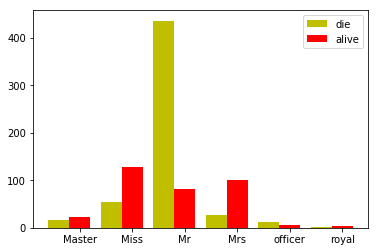

In [165]:
import matplotlib.pyplot as plt

feature_name = 'Title'
dies = ds[ds['Survived']==0]
dies = dies.groupby(feature_name).count()['Survived']
dies = dies.as_matrix()
alive = ds[ds['Survived']==1]
alive = alive.groupby(feature_name).count()['Survived']
alive = alive.as_matrix()
name_list = sorted(ds[feature_name].unique())
(dies, alive)

x = list(range(len(dies)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, dies, width=width, label='die',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, alive, width=width, label='alive',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()



In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [150]:
arr = ds.as_matrix()
Y = arr[:,:1]
Y
X = arr[:,1:]
# X = preprocessing.scale(X)
for random_state in range(20):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=random_state)
    clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
    print(clf.score(X_val, y_val))
clf.fit(X, Y)

/home/weize/workspace/python/VENV-3.5.2/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8097014925373134
0.7873134328358209
0.7985074626865671
0.7910447761194029
0.8619402985074627
0.8470149253731343
0.8619402985074627
0.7649253731343284
0.8246268656716418
0.7947761194029851
0.8283582089552238
0.835820895522388
0.8059701492537313
0.8097014925373134
0.8432835820895522
0.8208955223880597
0.8283582089552238
0.7947761194029851
0.835820895522388
0.8283582089552238


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
ds_test = pd.read_csv('./data/test.csv')
ds_test['Embarked'] = ds_test['Embarked'].fillna('S')

cleanup_nums = {"Sex":     {"male": 1, "female": 0},
                "Embarked": {"S": 0, "C": 1, "Q": 2}}
ds_test.replace(cleanup_nums, inplace=True)
fare_bins = [0,11,51,101,201,1000]
ds_test['Fare_range'] = pd.cut(ds_test['Fare'], fare_bins)
ds_test['Fare_range'] = ds_test['Fare_range'].fillna(pd.Interval(11, 51, closed='right'))
ids = ds_test['PassengerId']

age_bins = [0,3,10,18,50,60,120]
ds_test['Age_range'] = pd.cut(ds_test['Age'], age_bins)
ds_test['Age_range'].unique()
ds_test.groupby(ds_test['Age_range'])['Age_range'].count()
ds_test['Age_range'] = ds_test['Age_range'].fillna(pd.Interval(18, 50, closed='right'))
ds_test = ds_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Age', 'Fare', 'Name'], 1)

fare_ranges = sorted(ds_test['Fare_range'].unique())
fare_dict = {}
for i in range(len(fare_ranges)):
    fare_dict[fare_ranges[i]] = i
Age_dict = {}
Age_ranges = sorted(ds_test['Age_range'].unique())
for i in range(len(Age_ranges)):
    Age_dict[Age_ranges[i]] = i
cleanups = {"Age_range": Age_dict, 'Fare_range': fare_dict}
ds_test.replace(cleanups, inplace=True)

X_test = ds_test.as_matrix()
# X_test = preprocessing.scale(X_test)
X_test
Y_test = clf.predict(X_test)
Y_test
print('PassengerId,Survived')
for i in range(len(ids)):
    print(ids[i], ',', int(Y_test[i]))

PassengerId,Survived
892 , 0
893 , 1
894 , 0
895 , 0
896 , 1
897 , 0
898 , 1
899 , 0
900 , 1
901 , 0
902 , 0
903 , 0
904 , 1
905 , 0
906 , 1
907 , 1
908 , 0
909 , 0
910 , 1
911 , 1
912 , 0
913 , 0
914 , 1
915 , 0
916 , 1
917 , 0
918 , 1
919 , 0
920 , 0
921 , 0
922 , 0
923 , 0
924 , 0
925 , 0
926 , 0
927 , 0
928 , 1
929 , 1
930 , 0
931 , 0
932 , 0
933 , 0
934 , 0
935 , 1
936 , 1
937 , 0
938 , 0
939 , 0
940 , 1
941 , 1
942 , 0
943 , 0
944 , 1
945 , 1
946 , 0
947 , 0
948 , 0
949 , 0
950 , 0
951 , 1
952 , 0
953 , 0
954 , 0
955 , 1
956 , 1
957 , 1
958 , 1
959 , 0
960 , 0
961 , 0
962 , 1
963 , 0
964 , 1
965 , 0
966 , 1
967 , 0
968 , 0
969 , 1
970 , 0
971 , 1
972 , 1
973 , 0
974 , 0
975 , 0
976 , 0
977 , 0
978 , 1
979 , 1
980 , 1
981 , 1
982 , 1
983 , 0
984 , 1
985 , 0
986 , 0
987 , 0
988 , 1
989 , 0
990 , 1
991 , 0
992 , 1
993 , 0
994 , 0
995 , 0
996 , 1
997 , 0
998 , 0
999 , 0
1000 , 0
1001 , 0
1002 , 0
1003 , 1
1004 , 1
1005 , 1
1006 , 1
1007 , 0
1008 , 0
1009 , 1
1010 , 0
1011 , 1
1012 , 

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
model = Sequential()
model.add(Dense(16, input_shape=(6,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))
model.fit(X, Y, epochs=30, batch_size=32)
Y_test = model.predict_classes(X_test)
print('PassengerId,Survived')
for i in range(len(ids)):
    print(ids[i], ',', Y_test[i][0])

Epoch 1/30
891/891 [==============================] - 1s 1ms/step - loss: 0.7885 - acc: 0.5769
Epoch 2/30
891/891 [==============================] - 0s 108us/step - loss: 0.6938 - acc: 0.6947
Epoch 3/30
891/891 [==============================] - 0s 142us/step - loss: 0.6320 - acc: 0.7351
Epoch 4/30
891/891 [==============================] - 0s 93us/step - loss: 0.5893 - acc: 0.7755
Epoch 5/30
891/891 [==============================] - 0s 74us/step - loss: 0.5604 - acc: 0.7890
Epoch 6/30
891/891 [==============================] - 0s 71us/step - loss: 0.5418 - acc: 0.7912
Epoch 7/30
891/891 [==============================] - 0s 72us/step - loss: 0.5299 - acc: 0.7924
Epoch 8/30
891/891 [==============================] - 0s 74us/step - loss: 0.5223 - acc: 0.7969
Epoch 9/30
891/891 [==============================] - 0s 80us/step - loss: 0.5165 - acc: 0.7957
Epoch 10/30
891/891 [==============================] - 0s 89us/step - loss: 0.5121 - acc: 0.7957
Epoch 11/30
891/891 [=================